<a href="https://colab.research.google.com/github/PamellaBarbosa/aws-coffe/blob/main/aws_coffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas as pd
import sklearn

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
url = 'https://aws-coffe.s3.sa-east-1.amazonaws.com/coffee.csv'

In [ ]:
from inspect import Attribute
Attribute = ["Date", "Open", "High", "Low", "Close", "Volume", "Currency"]
dataset = Past = pd.read_csv(url, encoding = 'cp1252')
colunas = ["High", "Volume"]
dataset.columns = Attribute

In [ ]:
print(dataset) #base

            Date    Open    High     Low   Close  Volume Currency
0     2000-01-03  122.25  124.00  116.10  116.50    6640      USD
1     2000-01-04  116.25  120.50  115.75  116.25    5492      USD
2     2000-01-05  115.00  121.00  115.00  118.60    6165      USD
3     2000-01-06  119.00  121.40  116.50  116.85    5094      USD
4     2000-01-07  117.25  117.75  113.80  114.15    6855      USD
...          ...     ...     ...     ...     ...     ...      ...
5741  2022-08-29  240.55  240.55  240.55  240.50       1      USD
5742  2022-08-30  238.75  241.75  238.75  239.15      14      USD
5743  2022-08-31  240.75  240.75  239.65  239.10      12      USD
5744  2022-09-01  238.55  238.55  236.60  236.35       6      USD
5745  2022-09-02  232.50  234.05  228.28  228.42       0      USD

[5746 rows x 7 columns]


In [ ]:
print(dataset.shape) #linhas e colunas

(5746, 7)


In [ ]:
print(dataset.head()) #primeiras linhas 

         Date    Open    High     Low   Close  Volume Currency
0  2000-01-03  122.25  124.00  116.10  116.50    6640      USD
1  2000-01-04  116.25  120.50  115.75  116.25    5492      USD
2  2000-01-05  115.00  121.00  115.00  118.60    6165      USD
3  2000-01-06  119.00  121.40  116.50  116.85    5094      USD
4  2000-01-07  117.25  117.75  113.80  114.15    6855      USD


In [ ]:
print(dataset.tail()) #últimas linhas

            Date    Open    High     Low   Close  Volume Currency
5741  2022-08-29  240.55  240.55  240.55  240.50       1      USD
5742  2022-08-30  238.75  241.75  238.75  239.15      14      USD
5743  2022-08-31  240.75  240.75  239.65  239.10      12      USD
5744  2022-09-01  238.55  238.55  236.60  236.35       6      USD
5745  2022-09-02  232.50  234.05  228.28  228.42       0      USD


In [ ]:
print(dataset.describe()) #descrição

              Open         High          Low        Close        Volume
count  5746.000000  5746.000000  5746.000000  5746.000000   5746.000000
mean    127.267635   128.847034   125.784669   127.215567   8807.178907
std      50.569425    51.164948    49.851487    50.506519   9612.789034
min      41.500000    42.000000    41.500000    41.500000      0.000000
25%      98.800000   100.112500    97.862500    98.650000     61.000000
50%     120.400000   121.600000   118.950000   120.250000   7008.000000
75%     144.800000   146.000000   143.000000   144.337500  14497.750000
max     305.300000   306.250000   304.000000   304.900000  62045.000000


In [ ]:
print(dataset.groupby('Open').size())

Open
41.50     1
41.90     1
42.00     3
42.25     1
42.70     1
         ..
295.90    1
298.15    1
298.35    1
305.00    1
305.30    1
Length: 2485, dtype: int64


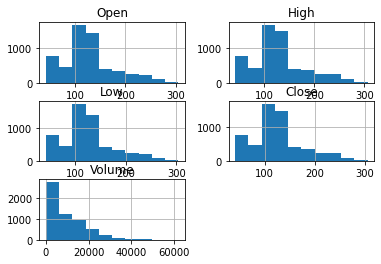

In [ ]:
dataset.hist()
plt.show()

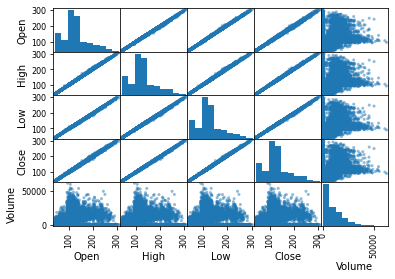

In [ ]:
scatter_matrix(dataset)
plt.show()

In [ ]:
print(type(dataset)) #tipo

<class 'pandas.core.frame.DataFrame'>


In [ ]:
array = dataset.values
array = dataset[colunas].values
X = array[:,0:2]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, 
                                 random_state=seed)

In [ ]:
print(type(array))

<class 'numpy.ndarray'>


In [ ]:
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', 
      multi_class='ovr'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
result = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  result.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.049389 (0.008804)
LDA: 0.033938 (0.008643)
KNN: 0.077239 (0.010517)
CART: 0.346177 (0.022816)
SVM: 0.086381 (0.007985)
